Perceptron

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DLL/WS1/dllws1.csv')
data.head()

,name,Test1,FinalTest
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [ ]:
x = data['Test1'].values.reshape(1,-1)
y = data['FinalTest'].values

In [ ]:
x

array([[92, 56, 88, 70, 80, 49, 65, 35, 66, 67]])

In [ ]:
W = np.random.uniform(-1,1,(1,1))
b = np.random.uniform(-1,1,(1,1))
learning_rate = 0.000001
epochs = 10000
losses = []

print("Initial Weight :",W)
print("Initial Bias :",b)

Initial Weight : [[0.48853903]]
Initial Bias : [[0.4440647]]


Batch gradient descent

In [ ]:
for i in range(10000):
  output = np.dot(W.T,x) + b
  loss = np.mean(np.square(y-output))
  losses.append(loss)
  error = y - output

  W = W + learning_rate * np.dot(error,x.T)
  b = b + learning_rate * np.sum(error)

  print("Epoch ",i+1," : Loss : ",loss,"Weight :",W,"Bias :",b)


Streaming output truncated to the last 5000 lines.
Epoch  5001  : Loss :  31.726744278527054 Weight : [[1.03832682]] Bias : [[0.45601788]]
Epoch  5002  : Loss :  31.72674413821694 Weight : [[1.03832681]] Bias : [[0.45601871]]
Epoch  5003  : Loss :  31.726743997906993 Weight : [[1.0383268]] Bias : [[0.45601955]]
Epoch  5004  : Loss :  31.72674385759721 Weight : [[1.03832679]] Bias : [[0.45602039]]
Epoch  5005  : Loss :  31.726743717287594 Weight : [[1.03832678]] Bias : [[0.45602123]]
Epoch  5006  : Loss :  31.726743576978105 Weight : [[1.03832677]] Bias : [[0.45602206]]
Epoch  5007  : Loss :  31.726743436668823 Weight : [[1.03832675]] Bias : [[0.4560229]]
Epoch  5008  : Loss :  31.72674329635966 Weight : [[1.03832674]] Bias : [[0.45602374]]
Epoch  5009  : Loss :  31.72674315605068 Weight : [[1.03832673]] Bias : [[0.45602458]]
Epoch  5010  : Loss :  31.726743015741885 Weight : [[1.03832672]] Bias : [[0.45602541]]
Epoch  5011  : Loss :  31.726742875433207 Weight : [[1.03832671]] Bias : [[

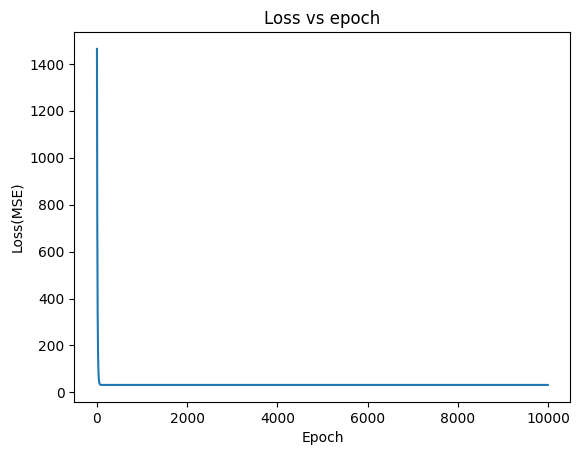

In [ ]:
plt.plot(losses)
plt.title('Loss vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [ ]:
print("Weight :",W)
print("Bias :",b)

Weight : [[1.03826783]]
Bias : [[0.46019855]]


Stochastic

In [ ]:
print(x[:,0])

[92]


In [ ]:
for i in range(epochs):
  for j in range(x.shape[1]):
    output = np.dot(W.T,x[:,j]) + b
    loss = np.mean(np.square(y[j]-output))
    losses.append(loss)
    error = y[j] - output

    W = W + learning_rate * np.dot(error,x[:,j].T)
    b = b + learning_rate * np.sum(error)

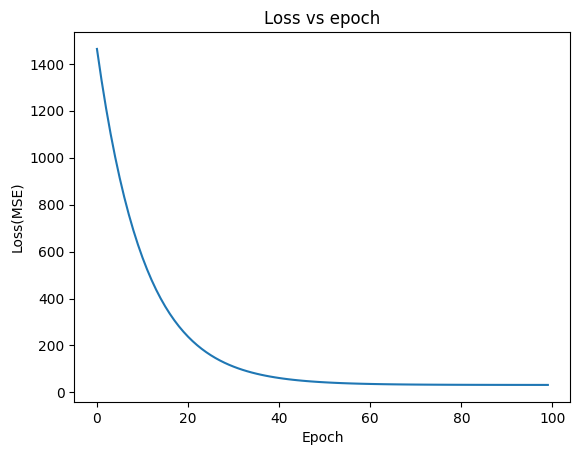

In [ ]:
plt.plot(losses[:100])
plt.title('Loss vs epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss(MSE)')
plt.show()

In [ ]:
print("Weight :",W)
print("Bias :",b)

Weight : [[1.03801151]]
Bias : [[0.46863353]]


Using pytorch

In [ ]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
x = torch.tensor(x,dtype=torch.float32)
y = torch.tensor(y,dtype=torch.float32)

In [ ]:
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1, 4)   # Input layer to 4 neurons =>X has only 1 column
        self.act1 = nn.ReLU()       # ReLU activation function
        self.l2 = nn.Linear(4, 1)   # Output layer 1 neuron

    def forward(self, x):
        # Forward pass
        x = self.l1(x)
        x = self.act1(x)
        x = self.l2(x)
        return x

In [ ]:
def fit(model):
    epochs = 400
    loss_arr = []
    loss_fn = nn.MSELoss()
    #optim = torch.optim.Adam(model.parameters(), lr=0.002)
    #optim = torch.optim.RMSprop(model.parameters(), lr=0.002)
    #optim = torch.optim.Adagrad(model.parameters(), lr=0.002)
    optim = torch.optim.SGD(model.parameters(), lr=0.002)

    for epoch in range(epochs):
        ypred = model(x.T)
        loss = loss_fn(ypred, y)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()

In [ ]:
model = FullyConnected()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


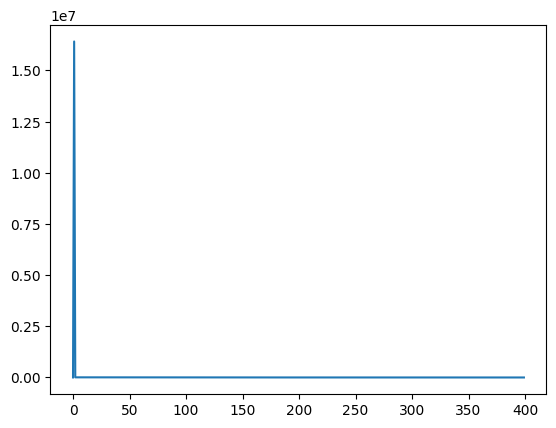

In [ ]:
fit(model)

**MLP(XOR)**

Pytorch implementation

In [ ]:
import torch
import torch.nn as nn

In [ ]:
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]],dtype=torch.float32)

In [ ]:
class FullyConnected(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_h1 = nn.Linear(2,4)
        self.act1 = nn.ReLU()
        self.h1_h2 = nn.Linear(4,2)
        self.act2 = nn.ReLU()
        self.h2_output = nn.Linear(2,1)
        self.act3 = nn.Sigmoid()

    def forward(self,x):
        x = self.input_h1(x)
        x = self.act1(x)
        x = self.h1_h2(x)
        x = self.act2(x)
        x = self.h2_output(x)
        x = self.act3(x)
        return x


In [ ]:
def fit(model):
    epochs = 100000
    loss_arr = []
    loss_fn = nn.BCELoss()
    optim = torch.optim.SGD(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        ypred = model(x)
        loss = loss_fn(ypred, y)
        loss_arr.append(loss.item())
        loss.backward()
        optim.step()
        optim.zero_grad()
    plt.plot(loss_arr)
    plt.show()

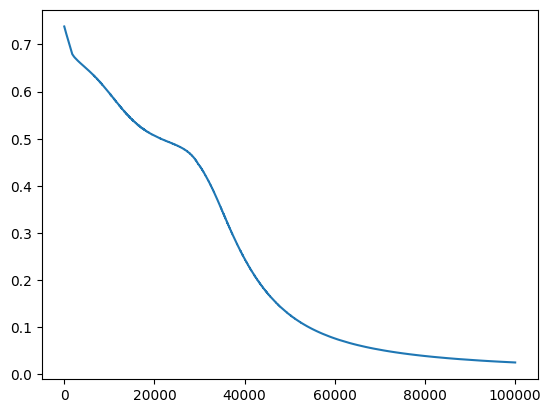

In [ ]:
model = FullyConnected()
fit(model)

In [ ]:
ytest_pred = model(x)
y_pred = torch.round(ytest_pred)

In [ ]:
ytest_pred

tensor([[0.0090],
        [0.9183],
        [0.9971],
        [0.0022]], grad_fn=<SigmoidBackward0>)

In [ ]:
y_pred

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

input_h1.weight tensor([[-0.6737,  0.4685],
        [-1.2392,  1.5843],
        [ 0.6656,  0.0121],
        [ 1.7982, -1.4341]])
input_h1.bias tensor([ 0.4433,  1.2392, -0.6890,  1.4340])
h1_h2.weight tensor([[-0.5910, -2.2683,  0.2361,  1.8163],
        [-0.2788, -0.2632,  0.4208,  1.9148]])
h1_h2.bias tensor([0.4683, 0.9973])
h2_output.weight tensor([[ 2.9900, -2.1626]])
h2_output.bias tensor([2.4196])


Manual implementation

In [47]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [61]:
input_size = 2
hidden_size = 4
output_size = 1

W1 = np.random.uniform(-1,1,(input_size,hidden_size))
b1 = np.random.uniform(-1,1,(1,hidden_size))
W2 = np.random.uniform(-1,1,(hidden_size,output_size))
b2 = np.random.uniform(-1,1,(1,output_size))

epochs = 1000000
learning_rate = 0.001
losses = []

In [62]:
def RELU(x):
  return np.maximum(x,0)

def RELU_derivative(x):
  return np.where(x>0,1,0)

def SIGMOID(x):
  return 1/(1+np.exp(-x))

def SIGMOID_derivative(x):
  return SIGMOID(x)*(1-SIGMOID(x))

In [63]:
W1

array([[-0.23616519, -0.20327096,  0.92033572, -0.82412832],
       [ 0.98327808,  0.74938847, -0.66246755,  0.90085507]])

In [64]:
b1

array([[ 0.94742134, -0.78299476,  0.69137396, -0.04084755]])

In [65]:
np.dot(x,W1)

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.98327808,  0.74938847, -0.66246755,  0.90085507],
       [-0.23616519, -0.20327096,  0.92033572, -0.82412832],
       [ 0.7471129 ,  0.54611751,  0.25786817,  0.07672674]])

In [66]:
hidden_sum=np.dot(x,W1)+b1
hidden_sum

array([[ 0.94742134, -0.78299476,  0.69137396, -0.04084755],
       [ 1.93069943, -0.03360629,  0.02890642,  0.86000752],
       [ 0.71125616, -0.98626572,  1.61170969, -0.86497587],
       [ 1.69453424, -0.23687725,  0.94924214,  0.03587919]])

In [67]:
hidden_output = RELU(np.dot(x,W1)+b1)
hidden_output

array([[0.94742134, 0.        , 0.69137396, 0.        ],
       [1.93069943, 0.        , 0.02890642, 0.86000752],
       [0.71125616, 0.        , 1.61170969, 0.        ],
       [1.69453424, 0.        , 0.94924214, 0.03587919]])

In [68]:
output_sum = np.dot(RELU(np.dot(x,W1)+b1),W2)+b2
output_sum

array([[ 0.1209837 ],
       [-0.28866325],
       [ 0.95276689],
       [ 0.09509612]])

In [69]:
output = SIGMOID(np.dot(RELU(np.dot(x,W1)+b1),W2)+b2)
output

array([[0.53020909],
       [0.42833116],
       [0.72167128],
       [0.52375613]])

In [70]:
error = y-output
error

array([[-0.53020909],
       [ 0.57166884],
       [ 0.27832872],
       [-0.52375613]])

In [71]:
SIGMOID_derivative(output_sum)

array([[0.24908741],
       [0.24486358],
       [0.20086184],
       [0.24943565]])

In [72]:
d_predicted_output = error * SIGMOID_derivative(output_sum)
d_predicted_output

array([[-0.13206841],
       [ 0.13998088],
       [ 0.05590562],
       [-0.13064345]])

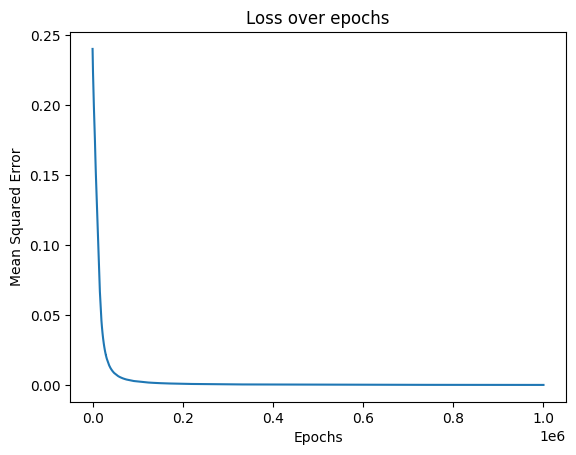

Predicted Output after training:
[[0.01385854]
 [0.99045244]
 [0.99002568]
 [0.00906019]]


In [73]:
for i in range(epochs):
  hidden_sum = np.dot(x,W1) + b1
  hidden_output =  RELU(hidden_sum)
  output_sum = np.dot(hidden_output,W2) + b2
  output = SIGMOID(output_sum)

  loss = np.mean(np.square(y-output))
  losses.append(loss)

  error = y - output
  d_predicted_output = error * SIGMOID_derivative(output_sum)
  W2 = W2 + learning_rate * np.dot(hidden_output.T,d_predicted_output)
  b2 = b2 + learning_rate * np.sum(d_predicted_output,axis=0,keepdims=True)

  d_hidden_layer = np.dot(d_predicted_output,W2.T) * RELU_derivative(hidden_sum)
  W1 = W1 + learning_rate * np.dot(x.T,d_hidden_layer)
  b1 = b1 + learning_rate * np.sum(d_hidden_layer,axis=0,keepdims=True)

plt.plot(losses)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# Testing the trained model
print("Predicted Output after training:")
print(output)


**MLP with momentum GD**

Pytorch

In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [18]:
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype = torch.float32)
y = torch.tensor([[0],[1],[1],[0]],dtype = torch.float32)

In [19]:
class FullyConnected(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_h1 = nn.Linear(2,4)
    self.act1 = nn.ReLU()
    self.h1_h2 = nn.Linear(4,2)
    self.act2 = nn.ReLU()
    self.h2_output = nn.Linear(2,1)
    self.act3 = nn.Sigmoid()

  def forward(self,x):
    x = self.input_h1(x)
    x = self.act1(x)
    x = self.h1_h2(x)
    x = self.act2(x)
    x = self.h2_output(x)
    x = self.act3(x)
    return x

In [20]:
def fit(model):
  epochs = 100000
  loss_arr = []
  loss_fn = nn.BCELoss()
  optimiser = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.005)

  for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    loss_arr.append(loss.item())
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()
  plt.plot(loss_arr)
  plt.show()

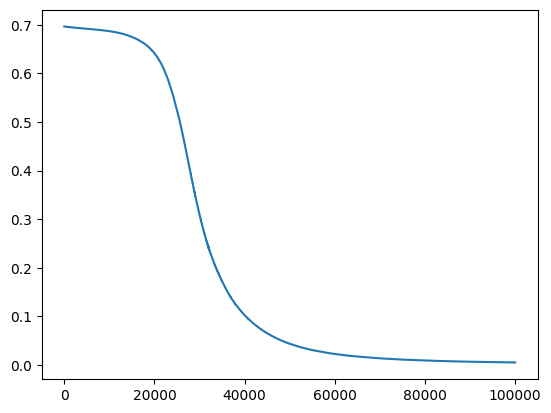

In [21]:
model = FullyConnected()
fit(model)

In [22]:
ytest_pred = model(x)
y_pred = torch.round(ytest_pred)

In [23]:
y_pred

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [24]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

input_h1.weight tensor([[ 0.4660, -0.4021],
        [-1.5666,  1.5666],
        [ 0.4796,  0.2698],
        [ 1.5719, -1.5719]])
input_h1.bias tensor([-6.3938e-02,  5.8277e-07,  6.2034e-01, -1.6601e-05])
h1_h2.weight tensor([[ 9.0904e-03, -2.9678e-01,  4.6896e-01, -3.8028e-01],
        [ 4.9484e-01,  2.1571e+00, -7.3414e-06,  2.0170e+00]])
h1_h2.bias tensor([ 1.2919e+00, -7.1607e-06])
h2_output.weight tensor([[-1.3859,  3.0038]])
h2_output.bias tensor([-2.3788])


Manual implementation

In [81]:
import pandas as pd
import numpy as np

In [95]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [96]:
input_size = 2
hidden_size =4
output_size = 1

epochs = 100000
learning_rate =0.001
momentum = 0.005
loss_arr = []

W1 = np.random.uniform(-1,1,(input_size,hidden_size))
b1 = np.random.uniform(-1,1,(1,hidden_size))
W2 = np.random.uniform(-1,1,(hidden_size,output_size))
b2 = np.random.uniform(-1,1,(1,output_size))

velocity_W1 = np.zeros_like(W1)
velocity_b1 = np.zeros_like(b1)
velocity_W2 = np.zeros_like(W2)
velocity_b2 = np.zeros_like(b2)

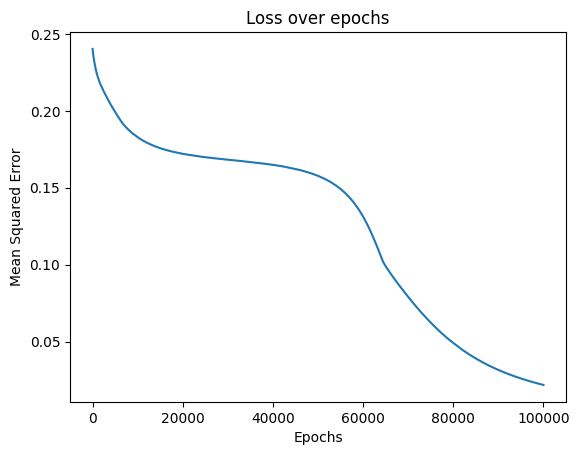

Predicted Output after training:
[[0.13578587]
 [0.91283328]
 [0.77418378]
 [0.10057822]]


In [97]:
for epoch in range(epochs):
  hidden_sum = np.dot(x,W1) + b1
  hidden_output = RELU(hidden_sum)
  output_sum = np.dot(hidden_output,W2) + b2
  output = SIGMOID(output_sum)

  loss = np.mean(np.square(y-output))
  loss_arr.append(loss)

  error = y - output
  d_predicted_output = error * SIGMOID_derivative(output_sum)
  grad_W2 = np.dot(hidden_output.T,d_predicted_output)
  velocity_W2 = momentum * velocity_W2 + learning_rate * grad_W2
  W2 = W2 + velocity_W2
  grad_b2 = np.sum(d_predicted_output,axis=0,keepdims=True)
  velocity_b2 = momentum * velocity_b2 + learning_rate * grad_b2
  b2 = b2 + velocity_b2

  d_hidden_layer = np.dot(d_predicted_output,W2.T) * RELU_derivative(hidden_sum)
  grad_W1 = np.dot(x.T,d_hidden_layer)
  velocity_W1 = momentum * velocity_W1 + learning_rate * grad_W1
  W1 = W1 + velocity_W1
  grad_b1 = np.sum(d_hidden_layer,axis=0,keepdims=True)
  velocity_b1 = momentum * velocity_b1 + learning_rate * grad_b1
  b1 = b1 + velocity_b1

plt.plot(loss_arr)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

# Testing the trained model
print("Predicted Output after training:")
print(output)

**MLP using Adagrad**

Pytorch

In [34]:
class FullyConnected(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_h1 = nn.Linear(2,4)
    self.act1 = nn.ReLU()
    self.h1_h2 = nn.Linear(4,2)
    self.act2 = nn.ReLU()
    self.h2_output = nn.Linear(2,1)
    self.act3 = nn.Sigmoid()

  def forward(self,x):
    x = self.input_h1(x)
    x = self.act1(x)
    x = self.h1_h2(x)
    x = self.act2(x)
    x = self.h2_output(x)
    x = self.act3(x)
    return x

In [35]:
def fit(model):
  epochs = 100000
  loss_arr = []
  loss_fn = nn.BCELoss()
  optimiser = torch.optim.Adagrad(model.parameters(),lr=0.001)

  for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    loss_arr.append(loss.item())
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()
  plt.plot(loss_arr)
  plt.show()

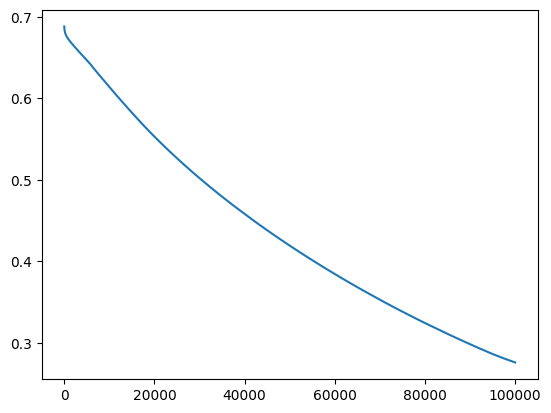

In [36]:
model = FullyConnected()
fit(model)

In [37]:
ytest_pred = model(x)
y_pred = torch.round(ytest_pred)

In [38]:
y_pred

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<RoundBackward0>)

In [39]:
for name,param in model.named_parameters():
  if param.requires_grad:
    print(name,param.data)

input_h1.weight tensor([[ 0.9726, -0.9690],
        [ 0.9601, -0.9177],
        [-0.8437,  0.6671],
        [ 0.5825, -0.7708]])
input_h1.bias tensor([-1.9743e-06, -2.0514e-06,  2.9534e-01,  7.7084e-01])
h1_h2.weight tensor([[ 0.7872,  0.8072,  1.1856, -0.7787],
        [ 0.9538,  0.6308, -0.7369,  0.8514]])
h1_h2.bias tensor([ 0.2757, -0.4386])
h2_output.weight tensor([[1.3339, 0.9753]])
h2_output.bias tensor([-0.9013])


Manual implementation

In [109]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [110]:
input_size = 2
hidden_size = 4
output_size = 1

epochs = 100000
learning_rate = 0.001
ephsilon = 1e-9
loss_arr = []

W1 = np.random.uniform(-1,1,(input_size,hidden_size))
W2 = np.random.uniform(-1,1,(hidden_size,output_size))
b1 = np.random.uniform(-1,1,(1,hidden_size))
b2 = np.random.uniform(-1,1,(1,output_size))

velocity_W1 = np.zeros_like(W1)
velocity_b1 = np.zeros_like(b1)
velocity_W2 = np.zeros_like(W2)
velocity_b2 = np.zeros_like(b2)

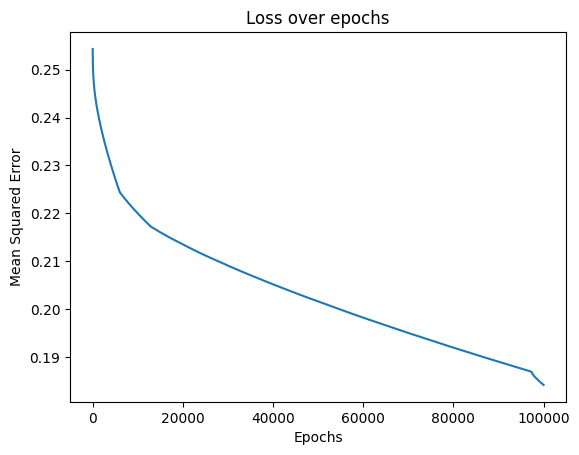

Predicted Output after training:
[[0.41918043]
 [0.56721488]
 [0.56982492]
 [0.43463716]]


In [111]:
for epoch in range(epochs):
  hidden_sum = np.dot(x,W1) + b1
  hidden_output = RELU(hidden_sum)
  output_sum = np.dot(hidden_output,W2) + b2
  output = SIGMOID(output_sum)

  loss = np.mean(np.square(y-output))
  loss_arr.append(loss)

  error = y - output
  d_predicted_output = error * SIGMOID_derivative(output_sum)
  grad_W2 = np.dot(hidden_output.T,d_predicted_output)
  velocity_W2 = velocity_W2 + grad_W2 ** 2
  W2 = W2 + learning_rate * grad_W2 / (np.sqrt(velocity_W2) + ephsilon)
  grad_b2 = np.sum(d_predicted_output,axis=0,keepdims=True)
  velocity_b2 = velocity_b2 + grad_b2 ** 2
  b2 = b2 + learning_rate * grad_b2 / (np.sqrt(velocity_b2) + ephsilon)

  d_hidden_layer = np.dot(d_predicted_output,W2.T) * RELU_derivative(hidden_sum)
  grad_W1 = np.dot(x.T,d_hidden_layer)
  velocity_W1 = velocity_W1 + grad_W1 ** 2
  W1 = W1 + learning_rate * grad_W1 / (np.sqrt(velocity_W1) + ephsilon)
  grad_b1 = np.sum(d_hidden_layer,axis=0,keepdims=True)
  velocity_b1 = velocity_b1 + grad_b1 ** 2
  b1 = b1 + learning_rate * grad_b1 / (np.sqrt(velocity_b1) + ephsilon)

plt.plot(loss_arr)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()
# Testing the trained model
print("Predicted Output after training:")
print(output)

Multiclass using Iris Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(120, 4)

In [8]:
x_tr = torch.tensor(x_train,dtype=torch.float32)
x_te = torch.tensor(x_test,dtype=torch.float32)
y_tr = torch.tensor(y_train,dtype=torch.long)
y_te = torch.tensor(y_test,dtype=torch.long)

In [9]:
class FullyConnected(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_h1 = nn.Linear(4,5)
    self.act1 = nn.ReLU()
    self.h1_h2 = nn.Linear(5,3)
    self.act2 = nn.ReLU()
    self.h2_output = nn.Linear(3,3)
    self.act3 = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.input_h1(x)
    x = self.act1(x)
    x = self.h1_h2(x)
    x = self.act2(x)
    x = self.h2_output(x)
    x = self.act3(x)
    return x

In [10]:
def fit(model):
  epochs = 100000
  loss_train_arr = []
  loss_test_arr = []
  loss_fn = nn.CrossEntropyLoss()
  optim = torch.optim.Adagrad(model.parameters(),lr=0.001)
  for epoch in range(epochs):
    ypred = model(x_tr)
    loss = loss_fn(ypred,y_tr)
    loss_train_arr.append(loss.item())
    ypred_test = model(x_te)
    loss_test = loss_fn(ypred_test,y_te)
    loss_test_arr.append(loss_test.item())
    loss.backward()
    optim.step()
    optim.zero_grad()
  plt.plot(loss_train_arr,label='Train')
  plt.plot(loss_test_arr,label='Test')
  plt.legend()
  plt.show()

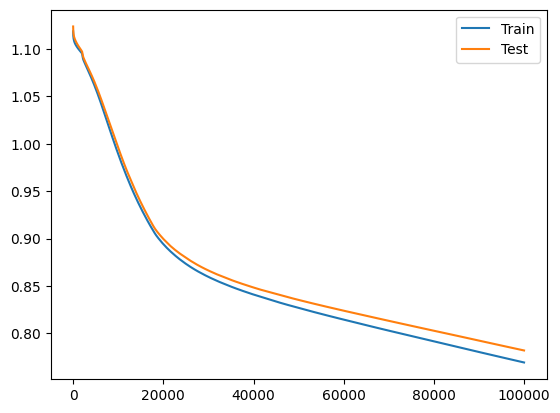

In [11]:
model = FullyConnected()
fit(model)

In [12]:
ypred_test = model(x_te)
ypred = torch.argmax(ypred_test,dim=1)

In [14]:
ypred

tensor([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2,
        1, 2, 2, 2, 0, 0])

In [16]:
print("Accuracy : ",accuracy_score(ypred,y_te))
print("Precision : ",precision_score(ypred,y_te,average = 'weighted'))
print("Recall : ",recall_score(ypred,y_te,average = 'weighted'))
print("F1 Score : ",f1_score(ypred,y_te,average = 'weighted'))

Accuracy :  0.9
Precision :  0.9272727272727274
Recall :  0.9
F1 Score :  0.9007518796992481


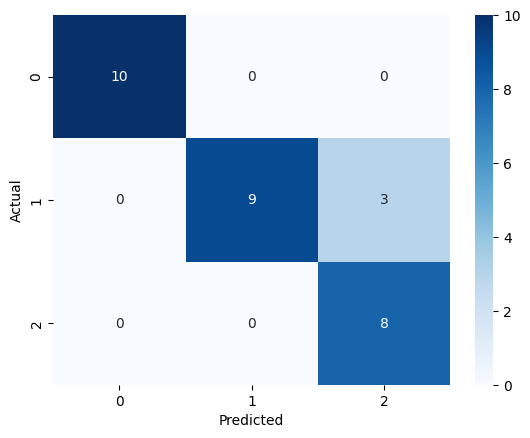

In [20]:
sns.heatmap(confusion_matrix(ypred,y_te),cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Optimisers with functions**

SGD and Momentum SGD

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

x, y = symbols('x y')

beale_function = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

grad_x = diff(beale_function, x)
grad_y = diff(beale_function, y)

beale_func = lambdify((x, y), beale_function, modules="numpy")
grad_func_x = lambdify((x, y), grad_x, modules="numpy")
grad_func_y = lambdify((x, y), grad_y, modules="numpy")

In [22]:
def compute_gradients(params):
    x_val, y_val = params
    return np.array([grad_func_x(x_val, y_val), grad_func_y(x_val, y_val)])

In [23]:
def sgd(func, grad_func, learning_rate=0.01, epochs=1000, initial_point=(1.0, 1.0)):
    params = np.array(initial_point, dtype=np.float64)
    history = [(*params, func(*params))]

    for _ in range(epochs):
        grads = grad_func(params)
        params -= learning_rate * grads
        history.append((*params, func(*params)))

    return params, history


In [24]:
def sgd_momentum(func, grad_func, learning_rate=0.01, momentum=0.9, epochs=1000, initial_point=(1.0, 1.0)):
    params = np.array(initial_point, dtype=np.float64)
    velocity = np.zeros_like(params)
    history = [(*params, func(*params))]

    for _ in range(epochs):
        grads = grad_func(params)
        velocity = momentum * velocity - learning_rate * grads
        params += velocity

        history.append((*params, func(*params)))

    return params, history

In [25]:
learning_rate = 0.01
epochs = 10000
initial_point = (1.0, 1.0)

params_sgd, history_sgd = sgd(beale_func, compute_gradients, learning_rate, epochs, initial_point)
x_sgd, y_sgd = params_sgd
print(f"SGD Result: x = {x_sgd:.4f}, y = {y_sgd:.4f}, f(x, y) = {beale_func(x_sgd, y_sgd):.6f}")

params_momentum, history_momentum = sgd_momentum(beale_func, compute_gradients, learning_rate, 0.9, epochs, initial_point)
x_momentum, y_momentum = params_momentum
print(f"Momentum SGD Result: x = {x_momentum:.4f}, y = {y_momentum:.4f}, f(x, y) = {beale_func(x_momentum, y_momentum):.6f}")


SGD Result: x = 3.0000, y = 0.5000, f(x, y) = 0.000000
Momentum SGD Result: x = 3.0000, y = 0.5000, f(x, y) = 0.000000


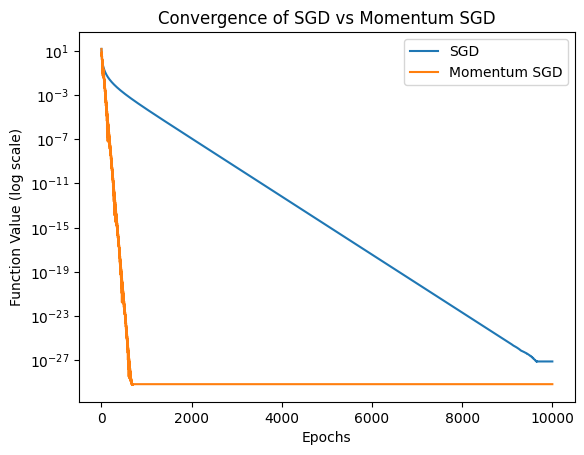

In [26]:
plt.plot([h[2] for h in history_sgd], label="SGD")
plt.plot([h[2] for h in history_momentum], label="Momentum SGD")
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Function Value (log scale)")
plt.title("Convergence of SGD vs Momentum SGD")
plt.legend()
plt.show()
